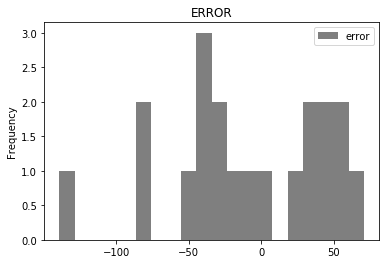

In [1]:
#imports and prepares
import numpy as np
import matplotlib.pyplot as plt
# magic command
%matplotlib inline
plt.close('all')
import pandas as pd
import sklearn.linear_model

# size of sample
n = 20

mu = 0
sigma = 80
# error belongs to N(mu,sigma^2)
error =mu+sigma*np.random.randn(n)
# show error distribution in hist
de = pd.DataFrame({'error':error},columns=['error'])
de.plot.hist(alpha= 0.5,bins =20,color = 'k',title = "ERROR")
plt.show()



In [2]:

a=20
b=100
# linear sample on [a;b]
x = a+np.random.rand(n)*(b-a)
k = 4
c= -80
print("The order is: "+str(k)+"*x+"+str(c))
y = k*x+c
df = pd.DataFrame(data = {'Y':y,'X':x}, columns = ['Y','X'])
df

The order is: 4*x+-80


,Y,X
0,194.180574,68.545143
1,248.411040,82.102760
2,36.433470,29.108367
3,40.173700,30.043425
4,8.200296,22.050074
5,15.938631,23.984658
6,118.044849,49.511212
7,269.981684,87.495421
8,291.239536,92.809884
9,301.181414,95.295354


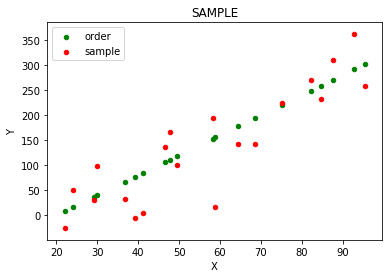

In [3]:
# linear sample with error
lin_x = df.plot.scatter(x='X',y='Y',title = "ORDER",color = "green",label = "order")
z=y+error
dfn = pd.DataFrame(data = {'Y':z,'X':x}, columns = ['Y','X'])
sample = dfn.plot.scatter(x='X',y='Y',title = "SAMPLE",color = "red",label = "sample",ax=lin_x)
plt.show()


In [12]:
# theta_predict = (X^T*X)^(-1)*X^T*Y
X = np.array(x).reshape((n,1))
Y = np.array(z).reshape((n,1))
Xb = np.c_[np.ones((n,1)),X]
Xb

array([[ 1.        , 68.54514346],
       [ 1.        , 82.10276011],
       [ 1.        , 29.10836743],
       [ 1.        , 30.04342497],
       [ 1.        , 22.05007412],
       [ 1.        , 23.98465785],
       [ 1.        , 49.51121223],
       [ 1.        , 87.49542108],
       [ 1.        , 92.80988388],
       [ 1.        , 95.29535352],
       [ 1.        , 41.13114913],
       [ 1.        , 84.63424322],
       [ 1.        , 58.32614637],
       [ 1.        , 47.68876461],
       [ 1.        , 39.26686546],
       [ 1.        , 46.59809703],
       [ 1.        , 36.74263869],
       [ 1.        , 58.85288957],
       [ 1.        , 75.1140934 ],
       [ 1.        , 64.44831006]])

In [10]:
Xb.T.dot(Xb)

array([[2.00000000e+01, 1.13374950e+03],
       [1.13374950e+03, 7.49059111e+04]])

In [14]:
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(Y)
print("Predicted Theta by minimizing MSE(Mean Square Error):\n")
theta

Predicted Theta by minimizing MSE(Mean Square Error):



array([[-101.16558727],
       [   4.20206264]])

In [15]:
# _______________________________________________________________________
# Linear model
model = sklearn.linear_model.LinearRegression()
# train the model
model.fit(X, Y)
print("Linear Regression Model Coefs:",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))


Linear Regression Model Coefs: 4.202062640526299 -101.16558726865489
The score is:  0.7675001465070285


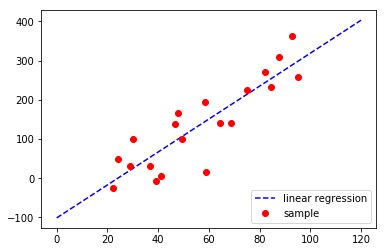

In [6]:
A = np.linspace(0,120,120)
plt.plot(A, model.intercept_[0] + model.coef_[0][0] * A,"b--",label = "linear regression")
plt.plot(x,z,"ro",label = "sample")
plt.legend(loc="lower right")
plt.show()

In [7]:
# 
# Ridge model
ridge = sklearn.linear_model.Ridge()
# train the model
ridge.fit(X, Y)
print("Ridge Model Coefs:",ridge.coef_[0][0],ridge.intercept_[0])
print("The score is: ",ridge.score(X,Y))


Ridge Model Coefs:
 4.20166761757088 -101.14319441482024
The score is:  0.767500139724399


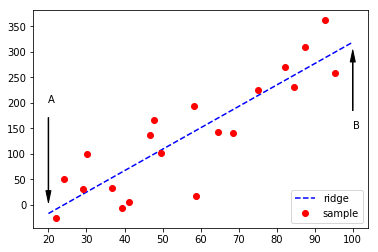

In [8]:
plt.figure()
B = np.linspace(a,b,120)
plt.plot(B, ridge.intercept_[0] + ridge.coef_[0][0] * B,"b--",label = "ridge")
plt.plot(x,z,"ro",label = "sample")
plt.legend(loc="lower right")

# ________________________________________________________________________
# annotation
text_annot = {
    'A':(a,200),
    'B':(b,150)
}
for annot_label,pos in text_annot.items():
    posX,posY = pos[0],ridge.predict([[pos[0]]])
    plt.annotate(annot_label,(posX,posY),pos,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))

plt.show()